In [1]:
from keras.datasets import mnist, cifar10
import matplotlib.pyplot as plt
import numpy as np

## Example of Convolution: 

Edge detection by comparing the center pixel to its neighbors:
$$ K = \begin{pmatrix} -1 & -1 & -1 \\ -1 & 8 & -1 \\ -1 & -1 & -1 \end{pmatrix} $$

Recall that if $\mathbf{O} \in \mathbb{R}^{d_1 \times d_2}$ is our input image and $\mathbf{K} \in \mathbb{R}^{k_1 \times k_2}$ is the kernel, then $\mathbf{A} = \mathbf{O} \star \mathbf{K} \in \mathbb{R}^{(d_1 - k + 1) \times (d_2 - k + 1)}$ and its entries are given by
$$
a_{ij} = \sum\nolimits_{u=1}^{k_1} \sum\nolimits_{v=1}^{k_2} o_{ i+(u-1), j+(v-1)}  k_{u, v}
$$

In [2]:
# Load some sample data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train.shape

(60000, 28, 28)

In [3]:
k = 3
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], dtype=float)
image = x_train[0,...]

def conv(kernel, image):
    d1, d2 = image.shape
    k1, k2 = kernel.shape
    convres = np.zeros((d1-k1+1, d2-k2+1))
    
    for row in range(d1-k1+1):
        for col in range(d2-k2+1):
            for u in range(k1):
                for v in range(k2):
                    convres[row,col] += image[row+u,col+v] * kernel[u,v]
                    
    return convres

convres = conv(kernel, image)

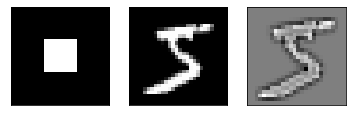

In [4]:
ax = plt.subplot(1, 3, 1)
plt.imshow(kernel)
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(1,3,2)
plt.imshow(image)
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(1,3,3)
plt.imshow(convres)
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

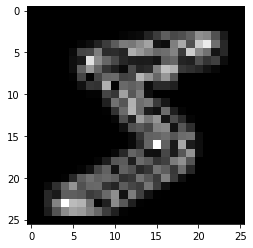

In [5]:
plt.imshow(np.abs(convres) * (convres != 0)) # the filter has large magnitude outputs where edges are present

### LeNet-5 Architecture for image classification on MNIST

The layers are as follows

<table>
    <tr>
        <th>Layer number</th>
        <th>Layer type</th>
        <th>Features (channels or neurons)</th>
        <th>Filter size</th>
        <th>Stride</th>
        <th>Activation</th>
    </tr>
    <tr>
        <td><em>Input</em></td>
        <td>Input</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
    </tr>
    <tr>
        <td>1</td>
        <td>Conv2D</td>
        <td>6 channels</td>
        <td>5x5</td>
        <td>1</td>
        <td>tanh</td>
    </tr>
    <tr>
        <td>2</td>
        <td>Average Pooling</td>
        <td>6 channels</td>
        <td>2x2</td>
        <td>2</td>
        <td>-</td>
    </tr>
    <tr>
        <td>3</td>
        <td>Conv2D</td>
        <td>16 channels</td>
        <td>5x5</td>
        <td>1</td>
        <td>tanh</td>
    </tr>
    <tr>
        <td>4</td>
        <td>Average Pooling</td>
        <td>16 channels</td>
        <td>2x2</td>
        <td>2</td>
        <td>tanh</td>
    </tr>
    <tr>
        <td>5</td>
        <td>Conv2D</td>
        <td>120 channels</td>
        <td>5x5</td>
        <td>1</td>
        <td>tanh</td>
    </tr>
    <tr>
        <td>6</td>
        <td>FC</td>
        <td>84 neurons</td>
        <td>-</td>
        <td>-</td>
        <td>tanh</td>
    </tr>
     <tr>
        <td>7</td>
        <td>FC</td>
        <td>10 neurons</td>
        <td>-</td>
        <td>-</td>
        <td>softmax</td>
    </tr>   
</table>

Note: we could use this same architecture for different datasets by changing the size of the input layers

In [18]:
# LeNet-5 architecture
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, InputLayer
from keras.losses import SparseCategoricalCrossentropy
from keras.utils import np_utils

lenet = Sequential([
    InputLayer(input_shape=(28, 28, 1)),
    # padding="same" pads input with enough zeros in each direction before convolution that the result of the convolution has the same size as the input image
    Conv2D(6, kernel_size=(5,5), strides=(1,1), activation='tanh', padding="same", name="C1"),
    AveragePooling2D(pool_size=(2,2), strides=(1,1), padding='valid', name="A1"), # no padding before pooling,
    Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='tanh', name="C2"), # by default padding is "valid",
    AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name="A2"),
    Conv2D(120, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid', name="C3"),
    Flatten(name="F"),
    Dense(84, activation='tanh', name="D1"),
    Dense(10, activation='softmax', name="D2")
 ])

In [16]:
lenet.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 28, 28, 6)         156       
_________________________________________________________________
A1 (AveragePooling2D)        (None, 27, 27, 6)         0         
_________________________________________________________________
C2 (Conv2D)                  (None, 23, 23, 16)        2416      
_________________________________________________________________
A2 (AveragePooling2D)        (None, 11, 11, 16)        0         
_________________________________________________________________
C3 (Conv2D)                  (None, 7, 7, 120)         48120     
_________________________________________________________________
F (Flatten)                  (None, 5880)              0         
_________________________________________________________________
D1 (Dense)                   (None, 84)               

In [19]:
lenet.compile(loss=SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [ ]:
x_train = x_train[...,None]
x_test = x_test[...,None]

history = lenet.fit(x_train, y_train, epochs=10, batch_size=128, validation_data = (x_test, y_test), verbose=1)

Epoch 1/10
113/469 [======>.......................] - ETA: 12s - loss: 0.0465 - accuracy: 0.9849